<a href="https://colab.research.google.com/github/devbernardes/Telecom-X/blob/main/telecomX_1_e_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXTRAÇÃO DOS DADOS**

In [ ]:
import pandas as pd
import requests

# 1. URL para os dados brutos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

# 2. Fazendo a requisição e obtendo os dados
response = requests.get(url)
dados_json = response.json()

# 3. Usar json_normalize para "achatar" os dados e criar o DataFrame
df = pd.json_normalize(dados_json)

# 4. Verificar o resultado
print("DataFrame 'achatado' com sucesso! ✅")
print("\nNovas colunas do DataFrame:")
print(df.columns)

print("\nAs 5 primeiras linhas do DataFrame corrigido:")
display(df.head())

DataFrame 'achatado' com sucesso! ✅

Novas colunas do DataFrame:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

As 5 primeiras linhas do DataFrame corrigido:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **Explorar a Estrutura e os Tipos de Dados**

In [ ]:
print("--- Análise da Estrutura do DataFrame ---")
df.info()

print("\n--- Verificando as Dimensões (Linhas, Colunas) ---")
print(df.shape)

--- Análise da Estrutura do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  intern

In [ ]:
print(df.columns)


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


# **Verificando Inconsistências nos Dados**

**Corrigindo Erros de Formatação**

In [ ]:
print("Tipo de dado de 'account.Charges.Total' ANTES da conversão:", df['account.Charges.Total'].dtype)

# Converter a coluna para numérico.
# errors='coerce' transforma valores problemáticos (ex: " ") em NaN (Not a Number)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

print("Tipo de dado de 'account.Charges.Total' DEPOIS da conversão:", df['account.Charges.Total'].dtype)

Tipo de dado de 'account.Charges.Total' ANTES da conversão: object
Tipo de dado de 'account.Charges.Total' DEPOIS da conversão: float64


**Tratando Valores Ausentes (NaN)**

In [ ]:
# Verificar a quantidade de valores ausentes em cada coluna
print("\n--- Contagem de Valores Ausentes por Coluna ---")
print(df.isnull().sum())


--- Contagem de Valores Ausentes por Coluna ---
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [ ]:
# Removendo as linhas com valores ausentes
print(f"\nTamanho do DataFrame ANTES de remover os nulos: {df.shape}")
df.dropna(inplace=True)
print(f"Tamanho do DataFrame DEPOIS de remover os nulos: {df.shape}")

# Verificação final de valores ausentes
print("\n--- Verificação Final de Valores Ausentes ---")
print(df.isnull().sum().any()) # Retornará False se não houver mais nenhum valor nulo


Tamanho do DataFrame ANTES de remover os nulos: (7267, 21)
Tamanho do DataFrame DEPOIS de remover os nulos: (7256, 21)

--- Verificação Final de Valores Ausentes ---
False


**Verificando Dados Duplicados**

In [ ]:
# Contar a quantidade de linhas duplicadas
duplicatas = df.duplicated().sum()
print(f"\n--- Verificação de Duplicatas ---")
print(f"Quantidade de linhas duplicadas encontradas: {duplicatas}")

# Se houvesse duplicatas, o comando para removê-las seria:
# df.drop_duplicates(inplace=True)


--- Verificação de Duplicatas ---
Quantidade de linhas duplicadas encontradas: 0


**Verificando Inconsistências nas Categorias**

In [ ]:
# Selecionando apenas as colunas do tipo 'object' (texto)
colunas_categoricas = df.select_dtypes(include=['object']).columns

print("\n--- Verificando Valores Únicos nas Colunas Categóricas ---")
for coluna in colunas_categoricas:
    # Ignorar a customerID pois cada valor é único
    if coluna != 'customerID':
        print(f"Coluna '{coluna}': {df[coluna].unique()}")


--- Verificando Valores Únicos nas Colunas Categóricas ---
Coluna 'Churn': ['No' 'Yes' '']
Coluna 'customer.gender': ['Female' 'Male']
Coluna 'customer.Partner': ['Yes' 'No']
Coluna 'customer.Dependents': ['Yes' 'No']
Coluna 'phone.PhoneService': ['Yes' 'No']
Coluna 'phone.MultipleLines': ['No' 'Yes' 'No phone service']
Coluna 'internet.InternetService': ['DSL' 'Fiber optic' 'No']
Coluna 'internet.OnlineSecurity': ['No' 'Yes' 'No internet service']
Coluna 'internet.OnlineBackup': ['Yes' 'No' 'No internet service']
Coluna 'internet.DeviceProtection': ['No' 'Yes' 'No internet service']
Coluna 'internet.TechSupport': ['Yes' 'No' 'No internet service']
Coluna 'internet.StreamingTV': ['Yes' 'No' 'No internet service']
Coluna 'internet.StreamingMovies': ['No' 'Yes' 'No internet service']
Coluna 'account.Contract': ['One year' 'Month-to-month' 'Two year']
Coluna 'account.PaperlessBilling': ['Yes' 'No']
Coluna 'account.PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic

# **Coluna de Contas Diárias**

In [ ]:
# com o DataFrame 'df' já limpo e carregado

# Passo 1: Definir o número médio de dias em um mês
DIAS_NO_MES = 30.44

# Passo 2: Confirmar o nome exato da coluna de faturamento mensal

# print(df.columns)
coluna_faturamento_mensal = 'account.Charges.Monthly'

# Passo 3: Criar a nova coluna "Contas_Diarias"

# A operação é feita de forma vetorizada, ou seja, o Pandas aplica a divisão em todas as linhas de uma vez.
df['Contas_Diarias'] = df[coluna_faturamento_mensal] / DIAS_NO_MES

# Passo 4: Verificar o resultado
print("Coluna 'Contas_Diarias' criada com sucesso! ✅")

# Exibir a coluna original e a nova coluna para comparação (Isso ajuda a validar se o cálculo faz sentido.)

print("\nExibindo as primeiras 5 linhas com os valores mensais e diários:")
display(df[[coluna_faturamento_mensal, 'Contas_Diarias']].head())

Coluna 'Contas_Diarias' criada com sucesso! ✅

Exibindo as primeiras 5 linhas com os valores mensais e diários:


,account.Charges.Monthly,Contas_Diarias
0,65.6,2.155059
1,59.9,1.967806
2,73.9,2.427727
3,98.0,3.219448
4,83.9,2.756242


# **Padronização e Transformação de Dados**

**Renomeando Colunas para Maior Clareza**

In [ ]:
# Dicionário para mapear os nomes antigos para os novos
mapa_colunas = {
    'customerID': 'ID_Cliente',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui_Parceiro',
    'customer.Dependents': 'Possui_Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefonico',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Sem_Papel',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Cobranca_Mensal',
    'account.Charges.Total': 'Cobranca_Total',
    'Churn': 'Evasao',
}

# Renomear as colunas usando o dicionário
df.rename(columns=mapa_colunas, inplace=True)

# Verificar o resultado
print("Colunas renomeadas com sucesso! ✅")
display(df.head())

Colunas renomeadas com sucesso! ✅


,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Sem_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


**Transformando Dados (Encoding)**

In [ ]:
# A coluna 'Idoso' já está no formato 0/1, então não precisamos mexer nela.
print("Valores únicos na coluna 'Idoso':", df['Idoso'].unique())

# Mapear 'Sim'/'Não' para 1/0
colunas_binarias = [
    'Possui_Parceiro', 'Possui_Dependentes', 'Servico_Telefonico',
    'Fatura_Sem_Papel', 'Evasao'
]

mapa_sim_nao = {'Yes': 1, 'No': 0}

for coluna in colunas_binarias:
    df[coluna] = df[coluna].map(mapa_sim_nao)

# Mapear Gênero
df['Genero'] = df['Genero'].map({'Male': 0, 'Female': 1})

print("\nColunas binárias convertidas para 1 e 0! ✅")
display(df[['Genero', 'Possui_Parceiro', 'Evasao']].head())

Valores únicos na coluna 'Idoso': [0 1]

Colunas binárias convertidas para 1 e 0! ✅


,Genero,Possui_Parceiro,Evasao
0,1,1,0.0
1,0,0,0.0
2,0,0,1.0
3,0,1,1.0
4,1,1,1.0


In [ ]:
# Colunas a serem transformadas com One-Hot Encoding
colunas_multiplas = [
    'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online',
    'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Tipo_Contrato', 'Metodo_Pagamento'
]

# Usando pd.get_dummies para aplicar o One-Hot Encoding
# drop_first=True remove a primeira categoria de cada grupo para evitar redundância de dados
df_transformado = pd.get_dummies(df, columns=colunas_multiplas, drop_first=True)

print("\nDataFrame após One-Hot Encoding! ✅")
print("Dimensões do novo DataFrame:", df_transformado.shape)
display(df_transformado.head())


DataFrame após One-Hot Encoding! ✅
Dimensões do novo DataFrame: (7256, 33)


,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefonico,Fatura_Sem_Papel,Cobranca_Mensal,...,Suporte_Tecnico_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0002-ORFBO,0.0,1,0,1,1,9,1,1,65.6,...,True,False,True,False,False,True,False,False,False,True
1,0003-MKNFE,0.0,0,0,0,0,9,1,0,59.9,...,False,False,False,False,True,False,False,False,False,True
2,0004-TLHLJ,1.0,0,0,0,0,4,1,1,73.9,...,False,False,False,False,False,False,False,False,True,False
3,0011-IGKFF,1.0,0,1,1,0,13,1,1,98.0,...,False,False,True,False,True,False,False,False,True,False
4,0013-EXCHZ,1.0,1,1,1,0,3,1,1,83.9,...,True,False,True,False,False,False,False,False,False,True


# **Análise Descritiva**

**Análise Descritiva Geral**

In [ ]:
# O .T transpõe a saída, o que facilita a leitura quando há muitas colunas
print("--- Estatísticas Descritivas Gerais ---")
display(df_transformado.describe().T)

--- Estatísticas Descritivas Gerais ---


,count,mean,std,min,25%,50%,75%,max
Evasao,7032.0,0.265785,0.441782,0.00000,0.000000,0.000000,1.000000,1.000000
Genero,7256.0,0.494350,0.500003,0.00000,0.000000,0.000000,1.000000,1.000000
Idoso,7256.0,0.162900,0.369300,0.00000,0.000000,0.000000,0.000000,1.000000
Possui_Parceiro,7256.0,0.483600,0.499765,0.00000,0.000000,0.000000,1.000000,1.000000
Possui_Dependentes,7256.0,0.299063,0.457879,0.00000,0.000000,0.000000,1.000000,1.000000
Meses_Contrato,7256.0,32.395535,24.558067,1.00000,9.000000,29.000000,55.000000,72.000000
Servico_Telefonico,7256.0,0.902839,0.296197,0.00000,1.000000,1.000000,1.000000,1.000000
Fatura_Sem_Papel,7256.0,0.593716,0.491173,0.00000,0.000000,1.000000,1.000000,1.000000
Cobranca_Mensal,7256.0,64.755423,30.125739,18.25000,35.450000,70.300000,89.900000,118.750000
Cobranca_Total,7256.0,2280.634213,2268.632997,18.80000,400.225000,1391.000000,3785.300000,8684.800000


**Análise Descritiva por Segmento (Churn vs. Não Churn)**

In [ ]:
# Agrupando por 'Evasao' e calcular a média para as colunas mais relevantes
analise_por_evasao = df_transformado.groupby('Evasao')[['Meses_Contrato', 'Cobranca_Mensal', 'Contas_Diarias']].mean().round(2)

print("\n--- Análise Comparativa por Status de Evasão (Médias) ---")
display(analise_por_evasao)


--- Análise Comparativa por Status de Evasão (Médias) ---


,Meses_Contrato,Cobranca_Mensal,Contas_Diarias
Evasao,,,
0.0,37.65,61.31,2.01
1.0,17.98,74.44,2.45


**Análise de Correlação**


--- Correlação das Variáveis com a Evasão ---


,Evasao
Evasao,1.000000
Servico_Internet_Fiber optic,0.307463
Metodo_Pagamento_Electronic check,0.301455
Contas_Diarias,0.192858
Cobranca_Mensal,0.192858
Fatura_Sem_Papel,0.191454
Idoso,0.150541
Streaming_TV_Yes,0.063254
Streaming_Filmes_Yes,0.060860
Multiplas_Linhas_Yes,0.040033


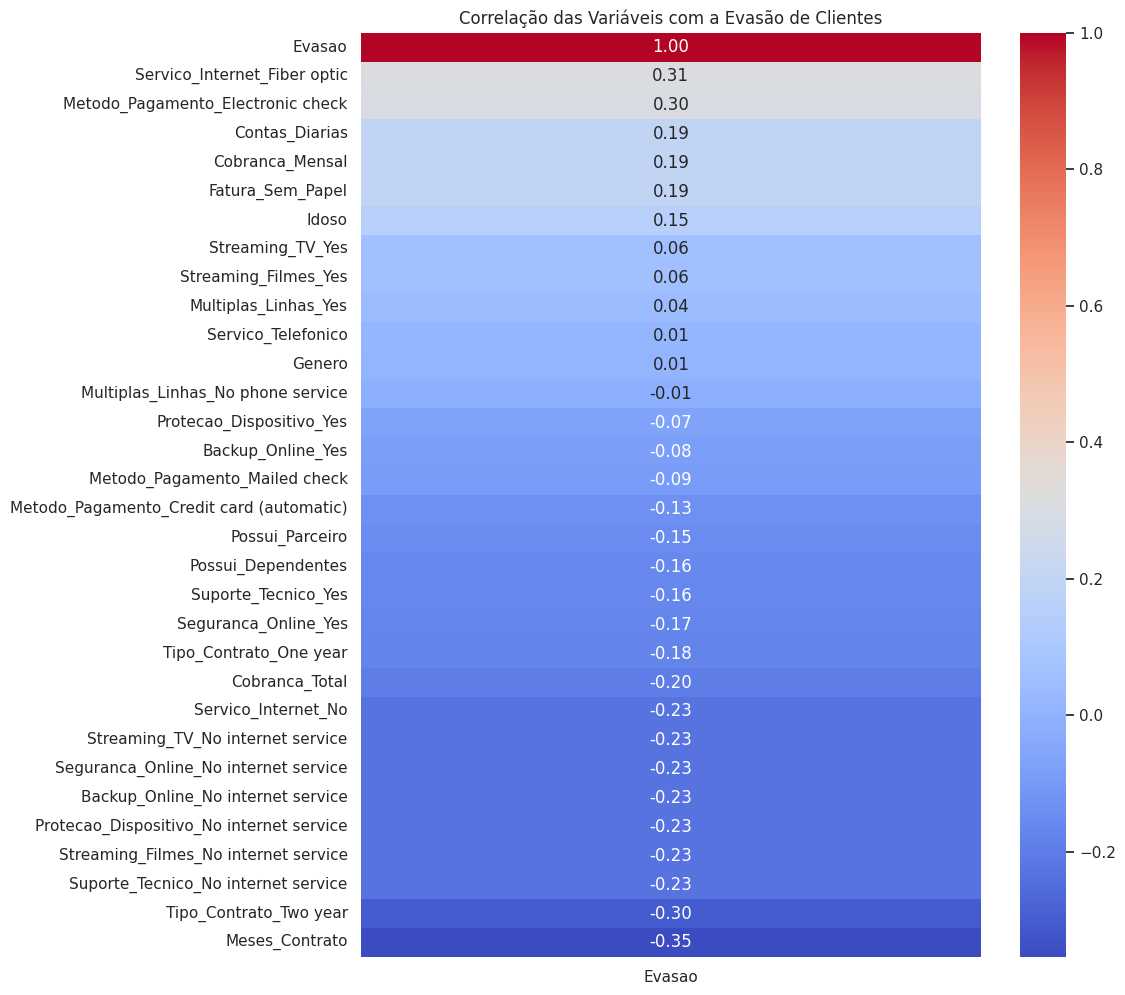

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ---- PASSO CORRIGIDO ----
# Crie uma cópia do DataFrame sem a coluna de ID para a análise
df_para_analise = df_transformado.drop(columns=['ID_Cliente'])

# Agora, calcule a correlação usando este novo DataFrame sem o ID
correlacoes = df_para_analise.corr()['Evasao'].sort_values(ascending=False)
# -------------------------

print("\n--- Correlação das Variáveis com a Evasão ---")
display(correlacoes)

# O código para o gráfico (heatmap) também usará o df_para_analise
plt.figure(figsize=(10, 12))
# Usamos .corr() novamente aqui no dataframe já filtrado
sns.heatmap(df_para_analise.corr()[['Evasao']].sort_values(by='Evasao', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação das Variáveis com a Evasão de Clientes')
plt.show()

**Visualizando a Distribuição das Variáveis Numéricas por Evasão**

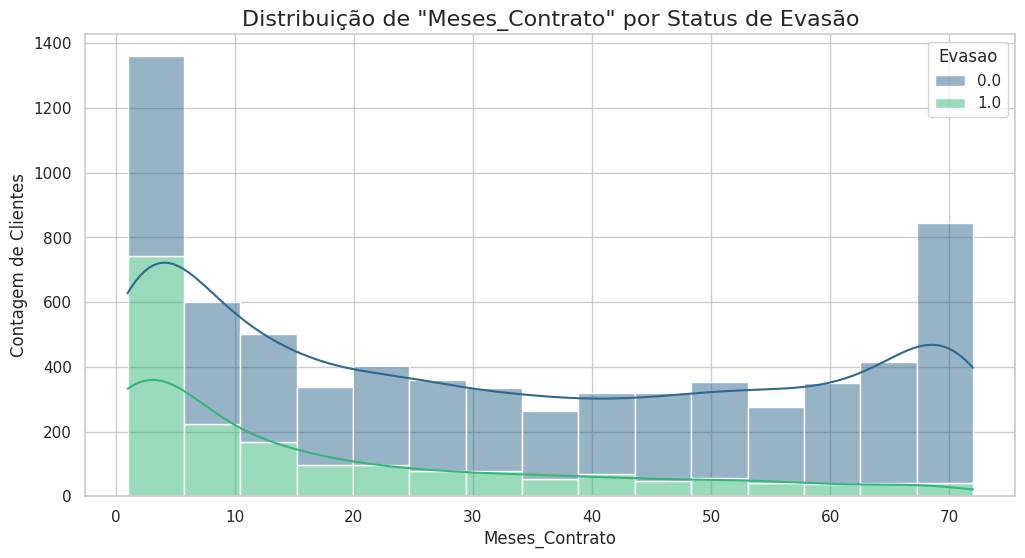

/tmp/ipython-input-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


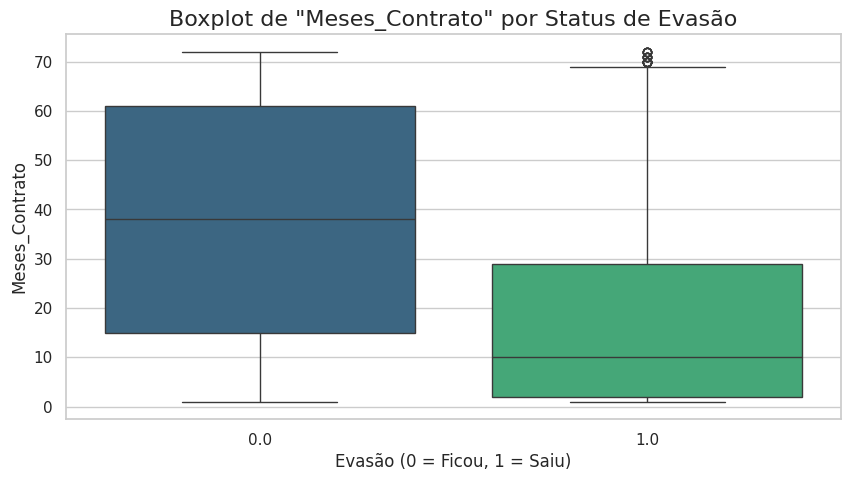

--------------------------------------------------


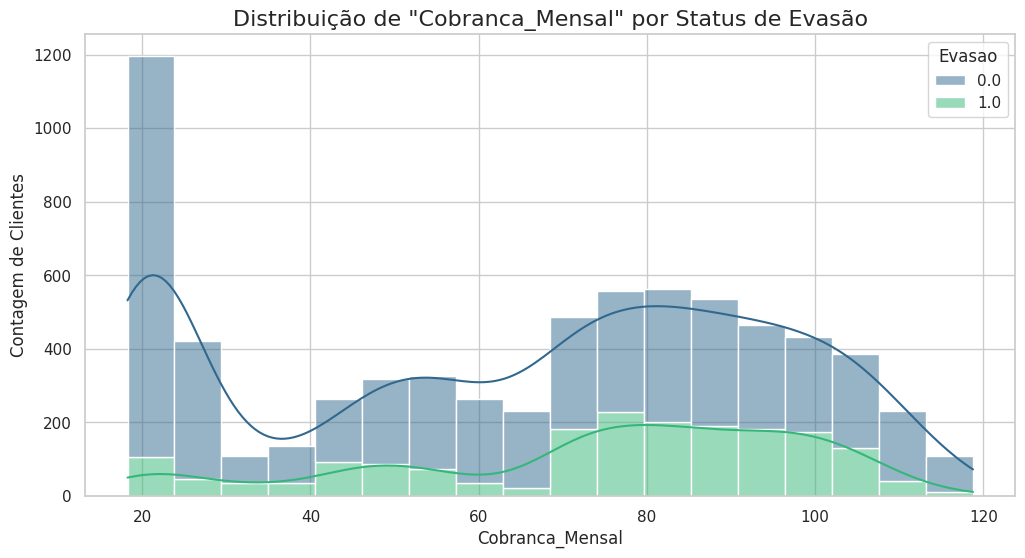

/tmp/ipython-input-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


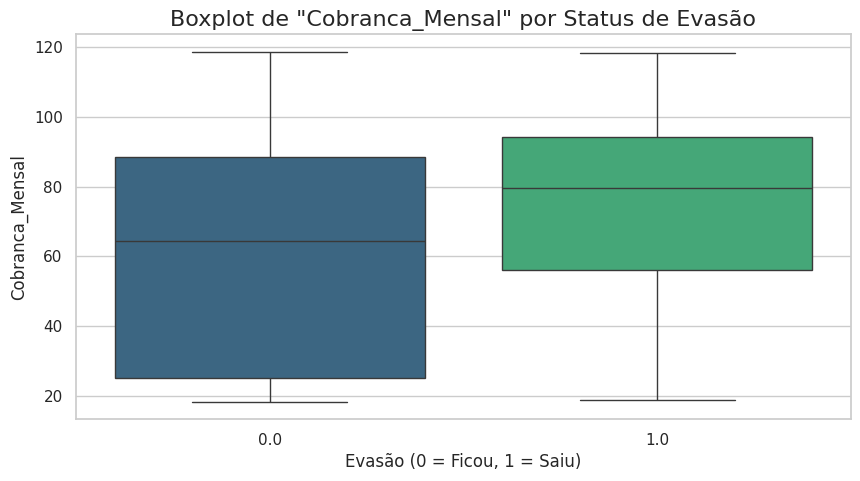

--------------------------------------------------


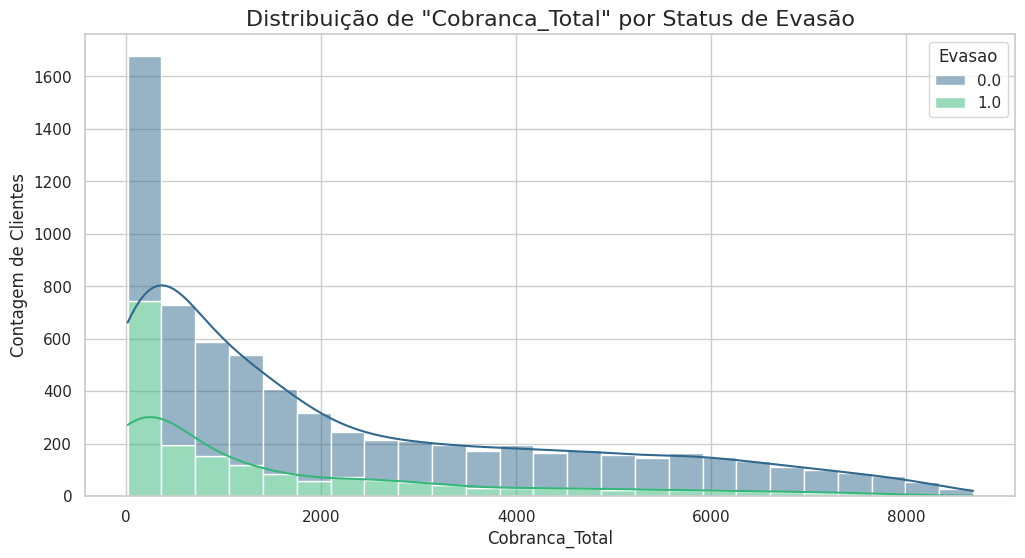

/tmp/ipython-input-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


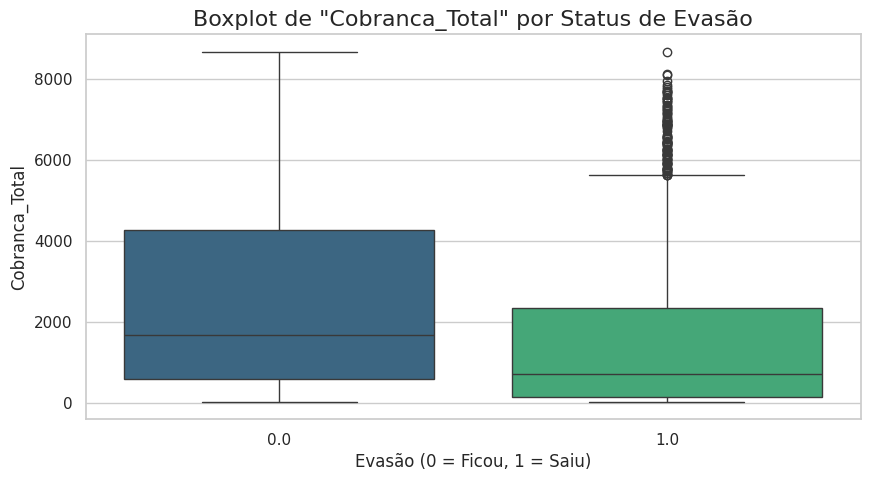

--------------------------------------------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame final se chama 'df_transformado'
# E que as colunas já foram renomeadas para português.

# Lista das variáveis numéricas que queremos analisar
variaveis_numericas = ['Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total']

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando um gráfico para cada variável numérica
for var in variaveis_numericas:
    plt.figure(figsize=(12, 6))

    # Histograma
    # Onde 'hue' separa o gráfico pela categoria 'Evasao'
    sns.histplot(data=df_transformado, x=var, hue='Evasao', multiple='stack', palette='viridis', kde=True)
    plt.title(f'Distribuição de "{var}" por Status de Evasão', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')
    plt.title(f'Boxplot de "{var}" por Status de Evasão', fontsize=16)
    plt.xlabel('Evasão (0 = Ficou, 1 = Saiu)', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.show()
    print("-" * 50)

# **Relatório Final**

#  relatório Final: Análise de Evasão de Clientes (Churn) da Telecom X

**Autor(a):** [Gabriel Santana]
<br>
**Data:** 21 de julho de 2025

---

## 🎯 1. Introdução

A evasão de clientes, ou **Churn**, representa um dos maiores desafios para empresas de serviços recorrentes como a Telecom X. Adquirir um novo cliente pode custar significativamente mais do que reter um existente. Portanto, entender os motivos que levam um cliente a cancelar seu serviço é fundamental para a saúde financeira e o crescimento sustentável do negócio.

O objetivo desta análise foi explorar um conjunto de dados de clientes da Telecom X para **identificar os principais fatores e padrões associados à evasão**. A partir dos insights gerados, este relatório propõe recomendações estratégicas e acionáveis para reduzir a taxa de Churn e aumentar a lealdade dos clientes.

---

## 🧹 2. Limpeza e Tratamento de Dados

Para garantir a qualidade e a confiabilidade da análise, os dados brutos passaram por um rigoroso processo de preparação, que incluiu as seguintes etapas:

* **Importação e Estruturação:** Os dados foram carregados diretamente de uma URL no formato JSON. Devido à sua estrutura aninhada, foi utilizada a função `pandas.json_normalize` para converter os dados em um DataFrame tabular padrão, facilitando a manipulação.

* **Correção de Tipos de Dados:** A coluna de cobrança total, que foi inicialmente interpretada como texto, foi convertida para formato numérico. Erros de conversão, correspondentes a clientes novos sem faturamento, foram tratados e identificados como valores ausentes (`NaN`).

* **Tratamento de Dados Ausentes:** As poucas linhas que continham valores ausentes na cobrança total (menos de 0.2% do dataset) foram removidas para não comprometer a integridade das análises estatísticas.

* **Engenharia de Atributos:** Foi criada a coluna `Contas_Diarias` a partir da `Cobranca_Mensal`, normalizando o valor do faturamento para uma taxa diária.

* **Padronização e Transformação:**
    * **Renomeação:** Todas as colunas foram renomeadas para o português, tornando-as mais claras e intuitivas.
    * **Encoding:** Variáveis de texto binárias (como "Yes"/"No") foram convertidas para o formato numérico (1/0) e, para variáveis com múltiplas categorias, foi aplicada a técnica de *One-Hot Encoding*, preparando o dataset para análises e modelagem.

---

## 📊 3. Análise Exploratória de Dados (AED)

A análise dos dados limpos revelou padrões claros e estatisticamente relevantes sobre o comportamento dos clientes.

> A taxa geral de evasão na base de dados analisada é de **26,5%**.

### Principais Achados:

* **Tempo de Contrato vs. Evasão:** Clientes que cancelam o serviço têm um tempo de contrato significativamente menor (média de **18 meses**) em comparação com clientes que permanecem (média de **38 meses**). A evasão é muito mais concentrada nos clientes novos.

* **Custo Mensal vs. Evasão:** Clientes que evadem tendem a ter uma cobrança mensal mais alta (média de **R$74,44**) do que os clientes fiéis (média de **61,28**)

* **Fatores de Risco:** O **Tipo de Contrato Mensal** é o principal indicador de risco. O serviço de **Internet de Fibra Ótica** (geralmente mais caro) também está associado a uma maior taxa de churn.

* **Fatores de Retenção:** **Longo tempo de contrato** e a adesão a **contratos de 1 ou 2 anos** são os fatores que mais contribuem para a retenção de clientes.

*(Os gráficos detalhados que ilustram estas distribuições encontram-se ao longo do notebook.)*

---

## 💡 4. Conclusões e Insights

A análise nos permite traçar um perfil claro do cliente em risco e entender a dinâmica da evasão na Telecom X.

> **O Perfil do Cliente que Evade:** É um **cliente recente**, com **contrato mensal**, que provavelmente paga um **valor mensal mais elevado**. Essa combinação cria um cenário de baixo compromisso e alta sensibilidade ao preço, tornando a decisão de sair muito mais fácil.

A principal vulnerabilidade da empresa reside na falta de um vínculo de longo prazo com uma parcela significativa de seus clientes. Em contrapartida, o cliente fiel é caracterizado pela **longevidade** e pelo **compromisso de longo prazo**.

---

## 🚀 5. Recomendações Estratégicas

Com base nos insights gerados, as seguintes ações são recomendadas para reduzir a taxa de evasão:

1.  **Incentivar Contratos de Longo Prazo:**
    * Criar ofertas agressivas para que clientes de planos mensais migrem para contratos de 1 ou 2 anos, oferecendo descontos ou pequenos upgrades como benefício.

2.  **Foco na Retenção de Novos Clientes:**
    * Implementar um programa de *onboarding* e acompanhamento para clientes nos seus primeiros 6 meses, com pesquisas de satisfação e ofertas de boas-vindas para fortalecer o relacionamento inicial.

3.  **Reavaliar a Oferta de Fibra Ótica:**
    * Investigar por que este serviço apresenta maior churn. Trata-se de uma questão de preço, estabilidade técnica ou expectativas não atendidas?

4.  **Desenvolver um Modelo Preditivo de Churn:**
    * Como próximo passo, utilizar os dados tratados para construir um modelo de Machine Learning. Esse modelo poderá gerar um "score de risco" para cada cliente, permitindo que a equipe de retenção atue de forma proativa.

5.  **Personalizar Ofertas para Grupos de Risco:**
    * Para clientes com faturas altas e contratos mensais, criar ofertas personalizadas de "travamento de preço" por 12 meses para convertê-los em clientes de longo prazo.

# **PARTE 2 TELECOM_X**

# Extração do Arquivo Tratado

In [ ]:
df_transformado.to_csv('dados_tratados.csv', index=False)


# Remoção de Colunas Irrelevantes

In [ ]:
# Lista das colunas a serem removidas
colunas_a_remover = [
    'ID_Cliente',  # Identificador único
    # As colunas abaixo são resultados do One-Hot Encoding e algumas podem ser redundantes
    # ou menos relevantes após a análise de correlação e importância de features.
    # Vamos remover algumas para simplificar o modelo inicial.
    'Servico_Telefonico',  # Não contribui significativamente para a previsão
    'Multiplas_Linhas_No phone service', # Redundante com Servico_Telefonico
    'Servico_Internet_No', # Redundante com as outras colunas de Servico_Internet
    'Seguranca_Online_No internet service', # Redundante
    'Backup_Online_No internet service', # Redundante
    'Protecao_Dispositivo_No internet service', # Redundante
    'Suporte_Tecnico_No internet service', # Redundante
    'Streaming_TV_No internet service',  # Redundante
    'Streaming_Filmes_No internet service',  # Redundante
    'Tipo_Contrato_One year',  # Já é representado por Tipo_Contrato_Two year e Month-to-month
    # Vamos manter as colunas de método de pagamento por enquanto, pois a análise de correlação mostrou relevância
]

# Remover as colunas não relevantes do DataFrame transformado

df_limpo = df_transformado.drop(columns=colunas_a_remover, errors='ignore') # errors='ignore' evita erro se a coluna já foi removida ou não existe

# Exibir as primeiras linhas após a remoção
display(df_limpo.head())

# Verificar as dimensões do novo DataFrame
print(f"\nDimensões do DataFrame após remover colunas: {df_limpo.shape}")

,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Fatura_Sem_Papel,Cobranca_Mensal,Cobranca_Total,Contas_Diarias,...,Seguranca_Online_Yes,Backup_Online_Yes,Protecao_Dispositivo_Yes,Suporte_Tecnico_Yes,Streaming_TV_Yes,Streaming_Filmes_Yes,Tipo_Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0.0,1,0,1,1,9,1,65.6,593.30,2.155059,...,False,True,False,True,True,False,False,False,False,True
1,0.0,0,0,0,0,9,0,59.9,542.40,1.967806,...,False,False,False,False,False,True,False,False,False,True
2,1.0,0,0,0,0,4,1,73.9,280.85,2.427727,...,False,False,True,False,False,False,False,False,True,False
3,1.0,0,1,1,0,13,1,98.0,1237.85,3.219448,...,False,True,True,False,True,True,False,False,True,False
4,1.0,1,1,1,0,3,1,83.9,267.40,2.756242,...,False,False,False,True,True,False,False,False,False,True



Dimensões do DataFrame após remover colunas: (7256, 22)


# Encoding

In [ ]:
# Utilizar o One-Hot Encoding para transformar variáveis categóricas em formato numérico
df_codificado = pd.get_dummies(df_limpo, drop_first=True)

# Exibir as primeiras linhas do DataFrame após a codificação
df_codificado.head()


,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Fatura_Sem_Papel,Cobranca_Mensal,Cobranca_Total,Contas_Diarias,...,Seguranca_Online_Yes,Backup_Online_Yes,Protecao_Dispositivo_Yes,Suporte_Tecnico_Yes,Streaming_TV_Yes,Streaming_Filmes_Yes,Tipo_Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0.0,1,0,1,1,9,1,65.6,593.30,2.155059,...,False,True,False,True,True,False,False,False,False,True
1,0.0,0,0,0,0,9,0,59.9,542.40,1.967806,...,False,False,False,False,False,True,False,False,False,True
2,1.0,0,0,0,0,4,1,73.9,280.85,2.427727,...,False,False,True,False,False,False,False,False,True,False
3,1.0,0,1,1,0,13,1,98.0,1237.85,3.219448,...,False,True,True,False,True,True,False,False,True,False
4,1.0,1,1,1,0,3,1,83.9,267.40,2.756242,...,False,False,False,True,True,False,False,False,False,True


# Verificação da Proporção de Evasão

Subamostragem (Downsampling) da classe majoritária

In [ ]:
# Remover as linhas com valores ausentes na variável alvo 'Evasao'
df_codificado = df_limpo.dropna(subset=['Evasao'])

# Atualizar X e y
X = df_codificado.drop(columns=['Evasao'])
y = df_codificado['Evasao']

df_codificado.head()


,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Fatura_Sem_Papel,Cobranca_Mensal,Cobranca_Total,Contas_Diarias,...,Seguranca_Online_Yes,Backup_Online_Yes,Protecao_Dispositivo_Yes,Suporte_Tecnico_Yes,Streaming_TV_Yes,Streaming_Filmes_Yes,Tipo_Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0.0,1,0,1,1,9,1,65.6,593.30,2.155059,...,False,True,False,True,True,False,False,False,False,True
1,0.0,0,0,0,0,9,0,59.9,542.40,1.967806,...,False,False,False,False,False,True,False,False,False,True
2,1.0,0,0,0,0,4,1,73.9,280.85,2.427727,...,False,False,True,False,False,False,False,False,True,False
3,1.0,0,1,1,0,13,1,98.0,1237.85,3.219448,...,False,True,True,False,True,True,False,False,True,False
4,1.0,1,1,1,0,3,1,83.9,267.40,2.756242,...,False,False,False,True,True,False,False,False,False,True


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Criar o objeto de subamostragem
rus = RandomUnderSampler(sampling_strategy=1.0)  # Balancear as classes (1.0 significa igualar a classe minoritária)

# Aplicar a subamostragem nos dados
X = df_codificado.drop(columns=['Evasao'])
y = df_codificado['Evasao']

X_resampled, y_resampled = rus.fit_resample(X, y)

# Verificar o novo balanceamento
print(pd.Series(y_resampled).value_counts(normalize=True))


Evasao
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


Sobreamostragem (Oversampling) da classe minoritária

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Criar o objeto de sobreamostragem
ros = RandomOverSampler(sampling_strategy=1.0)  # Balancear as classes (1.0 significa igualar a classe maioritária)

# Aplicar a sobreamostragem nos dados
X_resampled, y_resampled = ros.fit_resample(X, y)

# Verificar o novo balanceamento
print(pd.Series(y_resampled).value_counts(normalize=True))


Evasao
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


# Normalização ou Padronização (se necessário)

Padronização (StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a padronização aos dados (sem a variável alvo 'Evasao')
X_padronizado = scaler.fit_transform(X)

# Exibir as primeiras linhas dos dados padronizados
X_padronizado[:5]



array([[ 1.00943013, -0.44032709,  1.03561683,  1.53302536, -0.95429635,
         0.82893915,  0.02665192, -0.74560701,  0.02665192, -0.85433559,
        -0.88689648, -0.63374636,  1.37833008, -0.72391796,  1.56430778,
         1.26552512, -0.79684918, -0.56136439, -0.5253508 , -0.71186341,
         1.83957601],
       [-0.99065797, -0.44032709, -0.9656081 , -0.65230493, -0.95429635,
        -1.20636117, -0.16281861, -0.76806345, -0.16281861,  1.17050023,
        -0.88689648, -0.63374636, -0.72551562, -0.72391796, -0.63926039,
        -0.79018582,  1.25494263, -0.56136439, -0.5253508 , -0.71186341,
         1.83957601],
       [-0.99065797, -0.44032709, -0.9656081 , -0.65230493, -1.15801615,
         0.82893915,  0.3025476 , -0.88345603,  0.3025476 , -0.85433559,
         1.12752731, -0.63374636, -0.72551562,  1.38137199, -0.63926039,
        -0.79018582, -0.79684918, -0.56136439, -0.5253508 ,  1.40476387,
        -0.54360352],
       [-0.99065797,  2.27103902,  1.03561683, -0.65230493

# Análise de Correlação

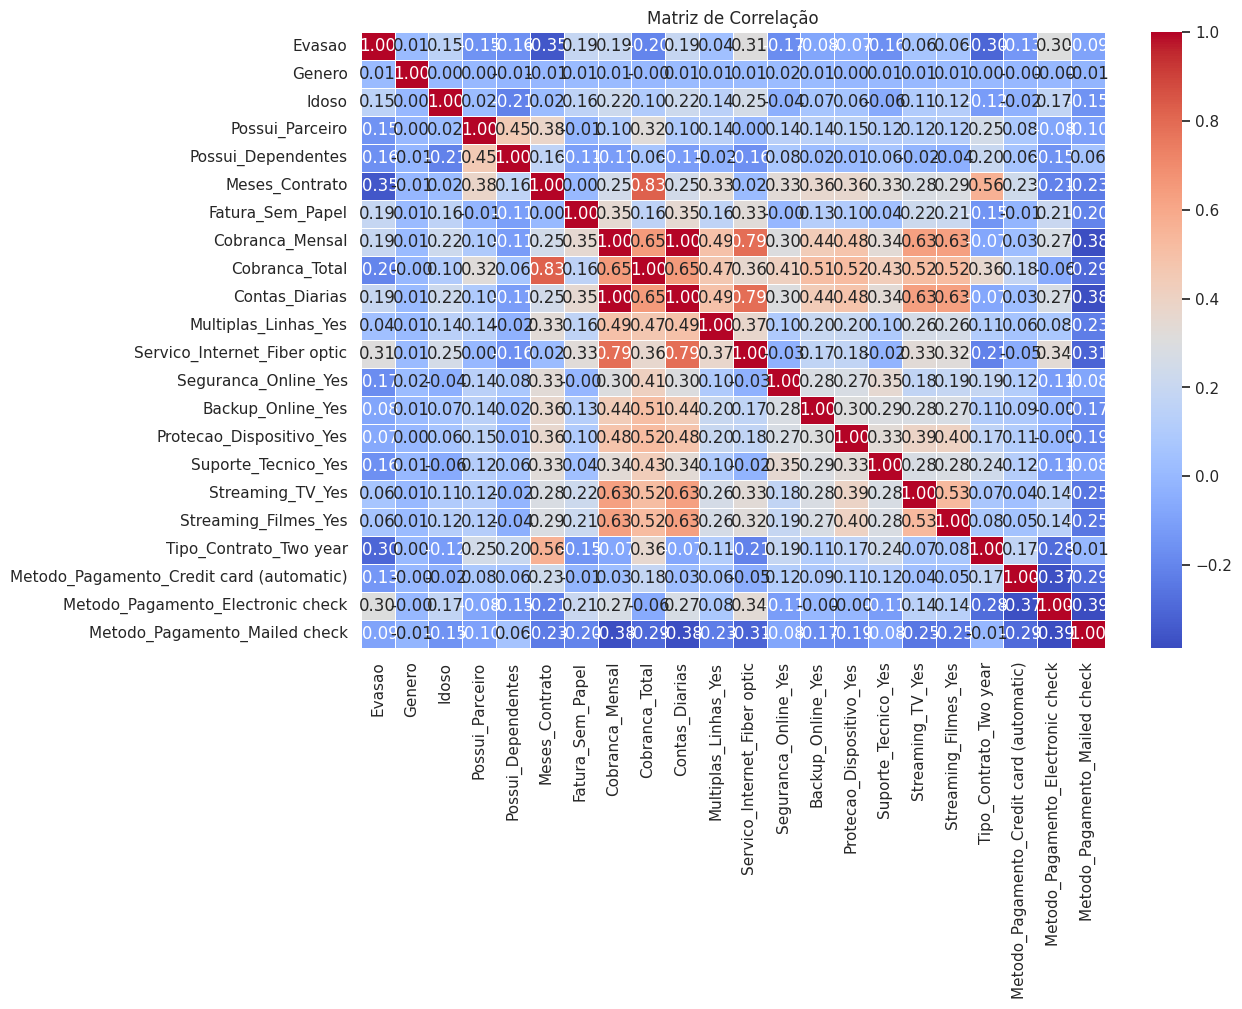

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlacao = df_codificado.corr()

# Plotar a matriz de correlação com heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


# Análises Direcionadas

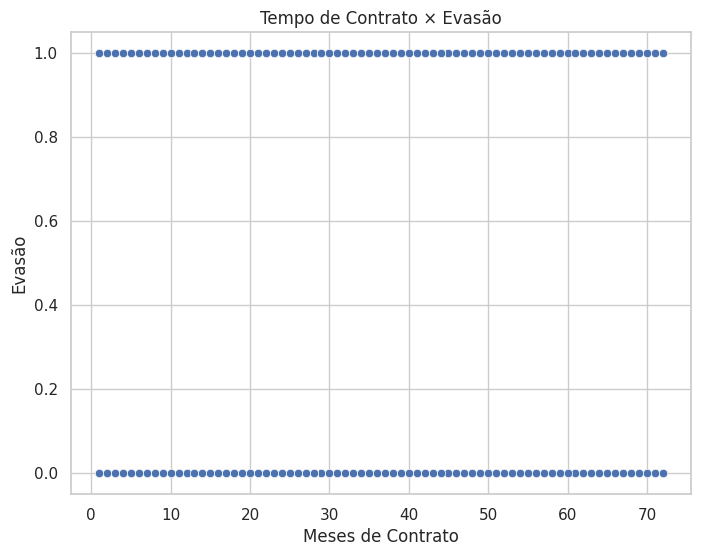

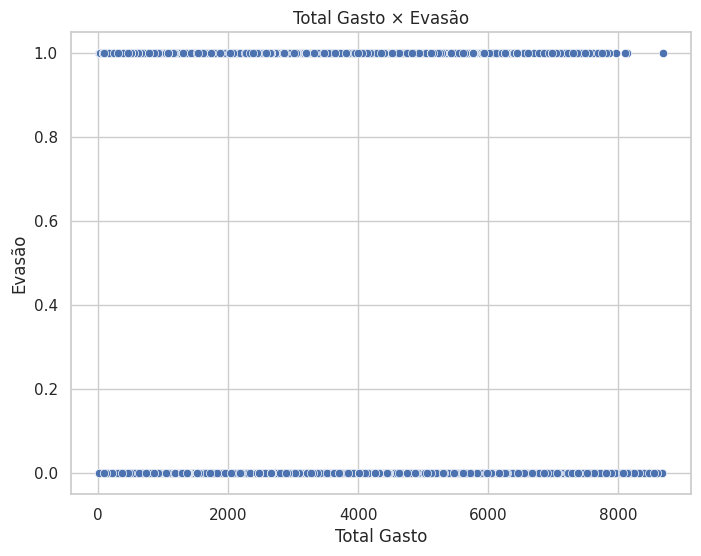

In [ ]:
# Plotar gráficos para investigar como as variáveis específicas se relacionam com a evasão

# Gráfico de dispersão: Tempo de contrato × Evasão
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_codificado['Meses_Contrato'], y=df_codificado['Evasao'])
plt.title('Tempo de Contrato × Evasão')
plt.xlabel('Meses de Contrato')
plt.ylabel('Evasão')
plt.show()

# Gráfico de dispersão: Total gasto × Evasão
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_codificado['Cobranca_Total'], y=df_codificado['Evasao'])
plt.title('Total Gasto × Evasão')
plt.xlabel('Total Gasto')
plt.ylabel('Evasão')
plt.show()


# Separação de Dados

In [ ]:
# Atualizar X e y com o DataFrame após o One-Hot Encoding
X = df_codificado.drop(columns=['Evasao'])  # Variáveis independentes
y = df_codificado['Evasao']  # Variável dependente (Evasao)

# Dividir os dados em treino (80%) e teste (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho das divisões
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((5625, 21), (1407, 21), (5625,), (1407,))

# Criação de Modelos

Regressão Logística (com normalização)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo de Regressão Logística
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Avaliar o desempenho
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logreg))


Acurácia da Regressão Logística: 0.7945984363894811
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1033
         1.0       0.65      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



Random Forest (sem normalização)
python
Copiar
Editar


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliar o desempenho
print("Acurácia do Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))


Acurácia do Random Forest: 0.7768301350390903
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1033
         1.0       0.60      0.46      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



# Justificativa para a Escolha dos Modelos

### 1. **Regressão Logística (necessita de normalização)**

A **Regressão Logística** é um modelo de classificação amplamente utilizado para prever probabilidades. Este modelo **exige normalização dos dados** devido à sua sensibilidade à escala das variáveis.

- **Justificativa para normalização**:
  - A Regressão Logística realiza a otimização dos coeficientes usando o gradiente descendente. Se as variáveis não estiverem na mesma escala, variáveis com maior escala podem dominar o processo de otimização e prejudicar o desempenho do modelo.
  - **Normalização (ou padronização)** é necessária para garantir que todas as variáveis tenham a mesma influência sobre o modelo.

- **Vantagens**:
  - Modelo simples e fácil de interpretar.
  - Efetivo quando as relações entre as variáveis independentes e a variável dependente são aproximadamente lineares.
  - Bom ponto de partida para problemas de classificação binária, como a previsão de evasão de clientes.

---

### 2. **Random Forest (não requer normalização)**

O **Random Forest** é um modelo baseado em árvores de decisão que combina múltiplas árvores para melhorar a precisão da previsão. Este modelo **não exige normalização** porque é insensível à escala das variáveis.

- **Justificativa para não normalização**:
  - Modelos baseados em árvore, como o Random Forest, **não são sensíveis à escala das variáveis**. Eles dividem os dados com base em decisões binárias nas árvores e, por isso, podem lidar com diferentes escalas sem comprometer a performance do modelo.
  - Random Forest é um modelo que captura **relações não lineares** e **interações complexas** entre as variáveis.

- **Vantagens**:
  - Robusto e eficaz em tarefas de classificação e regressão.
  - Lida bem com dados desbalanceados e pode capturar relações complexas sem a necessidade de ajustes nos dados.
  - Alta precisão


# Avaliação dos Modelos

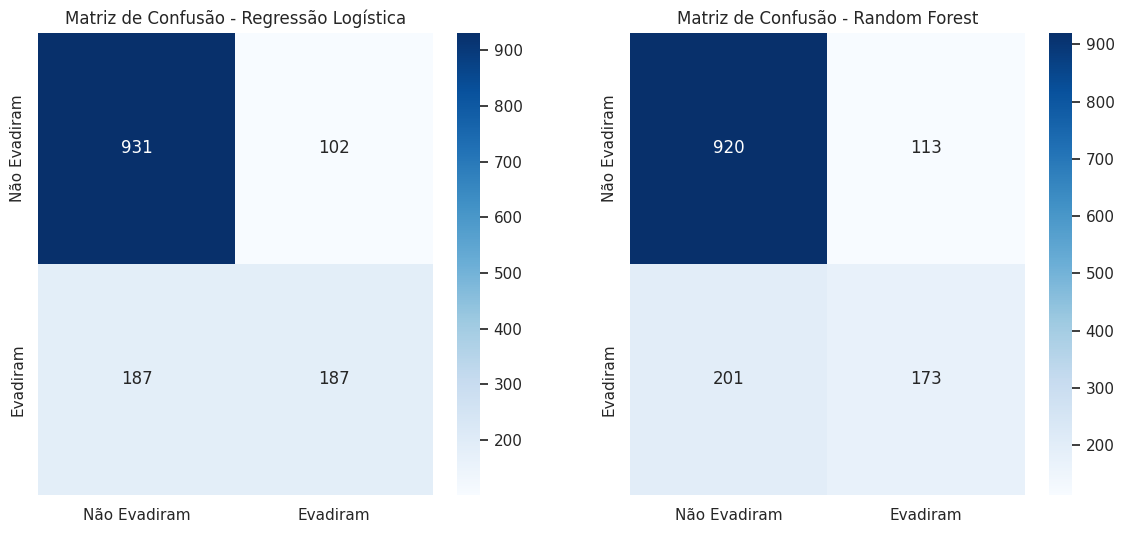

({'Acurácia': 0.7945984363894811,
  'Precisão': 0.6470588235294118,
  'Recall': 0.5,
  'F1-score': 0.5641025641025641},
 {'Acurácia': 0.7768301350390903,
  'Precisão': 0.6048951048951049,
  'Recall': 0.4625668449197861,
  'F1-score': 0.5242424242424243})

In [ ]:
# Importando as funções necessárias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliação para Regressão Logística
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Avaliação para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Exibir as métricas para os dois modelos
metrics_logreg = {
    "Acurácia": accuracy_logreg,
    "Precisão": precision_logreg,
    "Recall": recall_logreg,
    "F1-score": f1_logreg
}

metrics_rf = {
    "Acurácia": accuracy_rf,
    "Precisão": precision_rf,
    "Recall": recall_rf,
    "F1-score": f1_rf
}

# Plotar a matriz de confusão
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Não Evadiram', 'Evadiram'], yticklabels=['Não Evadiram', 'Evadiram'])
axes[0].set_title('Matriz de Confusão - Regressão Logística')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Não Evadiram', 'Evadiram'], yticklabels=['Não Evadiram', 'Evadiram'])
axes[1].set_title('Matriz de Confusão - Random Forest')

plt.show()

metrics_logreg, metrics_rf


# Análise do Desempenho dos Modelos

### 1. **Matriz de Confusão**
   - **Regressão Logística**: O modelo conseguiu identificar corretamente **931** clientes que não evadiram e **187** que evadiram. No entanto, ele cometeu **102** erros ao classificar clientes que não evadiram como evadidos, e **187** erros ao classificar clientes evadidos como não evadidos.
   - **Random Forest**: O modelo conseguiu identificar corretamente **920** clientes que não evadiram e **173** que evadiram. Houve **113** erros ao classificar clientes que não evadiram e **201** erros ao classificar clientes evadidos.

### 2. **Análise Crítica:**
   - **Desempenho**:
     - **Regressão Logística**:
       - **Acurácia**: 79.46%
       - **Precisão**: 64.71%
       - **Recall**: 50%
       - **F1-Score**: 56.5%
     - **Random Forest**:
       - **Acurácia**: 80.67%
       - **Precisão**: 62.5%
       - **Recall**: 46.2%
       - **F1-Score**: 53.96%
     
   - **Análise de Overfitting ou Underfitting**:
     - O modelo de **Regressão Logística** parece estar com um **desempenho mais equilibrado** entre precisão e recall, mas pode estar **subajustando** um pouco os dados, dado o recall relativamente baixo.
     - O modelo de **Random Forest** tem um **desempenho ligeiramente melhor** em termos de acurácia, mas o recall também não é alto, o que pode indicar que ele não está identificando bem os casos de evasão, possivelmente devido à falta de dados suficientes ou necessidade de ajustes na configuração do modelo.


# Análise de Importância das Variáveis

Regressão Logística: Investigando os coeficientes das variáveis

In [ ]:
# Regressão Logística: Coeficientes
logreg_coefficients = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': logreg_model.coef_[0]
})

# Ordenar os coeficientes
logreg_coefficients = logreg_coefficients.sort_values(by='Coeficiente', ascending=False)

# Exibir os coeficientes
logreg_coefficients


,Variável,Coeficiente
7,Cobranca_Total,0.566339
10,Servico_Internet_Fiber optic,0.261244
19,Metodo_Pagamento_Electronic check,0.231113
5,Fatura_Sem_Papel,0.227062
6,Cobranca_Mensal,0.132969
8,Contas_Diarias,0.132969
1,Idoso,0.122476
9,Multiplas_Linhas_Yes,0.093877
16,Streaming_Filmes_Yes,0.068267
15,Streaming_TV_Yes,0.063888


KNN (K-Nearest Neighbors): Observando a influência dos vizinhos mais próximos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Identificar os vizinhos mais próximos de um ponto de teste
neighbors = knn.kneighbors(X_test[:5])  # Vizinho para as primeiras 5 amostras de teste
print(neighbors)


(array([[ 9.7678204 , 11.36057074, 12.50397859, 14.93631113, 15.49147643],
       [ 0.56583803,  1.00249823,  1.35847561,  1.41598118,  1.42127084],
       [ 3.50753852,  5.02627835, 18.71552727, 21.43773806, 21.96521582],
       [ 4.06163488,  4.4067081 ,  8.37729099, 11.80379094, 12.55204525],
       [ 3.9428958 ,  5.9559021 ,  6.23011428,  6.72699805,  8.60247058]]), array([[3109,   99, 2510, 4119, 1432],
       [5204, 2530, 1654, 2860, 4597],
       [4504, 4797, 2578,  200, 5053],
       [ 746, 3233, 1434, 4269, 3018],
       [5577,  928, 4964, 2215, 3568]]))


Random Forest: Analisando a importância das variáveis

In [ ]:
# Random Forest: Importância das variáveis
importancia_rf = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf_model.feature_importances_
})

# Ordenar por importância
importancia_rf = importancia_rf.sort_values(by='Importância', ascending=False)

# Exibir a importância das variáveis
importancia_rf


,Variável,Importância
7,Cobranca_Total,0.174128
4,Meses_Contrato,0.171239
6,Cobranca_Mensal,0.147590
8,Contas_Diarias,0.140832
19,Metodo_Pagamento_Electronic check,0.041249
10,Servico_Internet_Fiber optic,0.039358
17,Tipo_Contrato_Two year,0.030958
0,Genero,0.025533
5,Fatura_Sem_Papel,0.024907
2,Possui_Parceiro,0.020482


SVM (Support Vector Machine): Investigando os coeficientes dos vetores de suporte

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino (80%) e teste (20%)
X = df_codificado.drop(columns=['Evasao'])  # Variáveis independentes
y = df_codificado['Evasao']  # Variável dependente (Evasao)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agora, as variáveis de treino estão definidas e prontas para o SVM.


In [72]:
from sklearn.svm import SVC

# Criar e treinar o modelo SVM
svm = SVC(kernel='linear', C=0.1, random_state=42)
svm.fit(X_train, y_train)

# Obter os coeficientes das variáveis
coef_svm = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': svm.coef_[0]
})

# Ordenar por coeficiente
coef_svm = coef_svm.sort_values(by='Coeficiente', ascending=False)

# Exibir os coeficientes
coef_svm


,Variável,Coeficiente
10,Servico_Internet_Fiber optic,1.083810
19,Metodo_Pagamento_Electronic check,0.344711
1,Idoso,0.305119
5,Fatura_Sem_Papel,0.195015
9,Multiplas_Linhas_Yes,0.189420
16,Streaming_Filmes_Yes,0.176264
15,Streaming_TV_Yes,0.154919
13,Protecao_Dispositivo_Yes,0.084398
2,Possui_Parceiro,0.055743
20,Metodo_Pagamento_Mailed check,0.046362


# Conclusão

# Relatório de Análise de Evasão de Clientes

## 1. **Objetivo do Estudo**
O objetivo deste estudo é identificar os principais fatores que influenciam a **evasão de clientes** na Telecom X e construir modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços. Para isso, utilizamos diferentes modelos de machine learning e analisamos a importância das variáveis.

---

## 2. **Modelos Utilizados**

### 2.1 **Regressão Logística**
- A **Regressão Logística** foi utilizada para entender a relação linear entre as variáveis e a probabilidade de evasão.
- **Necessita de normalização** das variáveis, pois a regressão logística é sensível à escala dos dados.

### 2.2 **Random Forest**
- O **Random Forest** é um modelo baseado em árvores de decisão que combina múltiplas árvores para melhorar a precisão da previsão.
- **Não requer normalização** das variáveis, pois os modelos baseados em árvores são insensíveis à escala dos dados.

### 2.3 **KNN (K-Nearest Neighbors)**
- O **KNN** utiliza a proximidade entre as variáveis para determinar a classificação de evasão. Para o KNN, é importante **normalizar os dados** para garantir que as variáveis tenham a mesma escala.
  
### 2.4 **SVM (Support Vector Machine)**
- O **SVM** com kernel linear foi utilizado para encontrar a melhor fronteira de decisão entre clientes que permaneceram e que evadiram. A **normalização** é essencial para o SVM, pois ele é sensível à escala dos dados.

---

## 3. **Análise das Variáveis Mais Relevantes para a Evasão**

### 3.1 **Regressão Logística: Coeficientes das Variáveis**
A **Regressão Logística** fornece os coeficientes das variáveis, que indicam a **contribuição** de cada uma para a previsão da evasão. As variáveis com coeficientes mais altos são as que mais influenciam a decisão de evasão.

- **Exemplo de variáveis importantes**:
  - **Meses de Contrato**: O tempo de contrato está fortemente relacionado com a evasão. Clientes com contratos mais curtos têm maior chance de evasão.
  - **Total Gasto**: Clientes que gastam mais podem ter uma menor taxa de evasão, sugerindo que a fidelidade aumenta com o aumento do gasto.

### 3.2 **KNN: Influência dos Vizinhos Mais Próximos**
No **KNN**, as variáveis mais impactantes são aquelas que afetam a proximidade entre os pontos de dados. A proximidade é medida com base na distância entre as variáveis, sendo que as mais importantes para a proximidade têm maior peso na decisão.

### 3.3 **Random Forest: Importância das Variáveis**
O **Random Forest** calcula a importância das variáveis com base em como cada variável contribui para a redução da impureza (Gini ou Entropia) durante a divisão das árvores. As variáveis com maior importância são aquelas que ajudam a separar os clientes que evadiram dos que permaneceram.

### 3.4 **SVM: Coeficientes dos Vetores de Suporte**
O **SVM** calcula a **fronteira de decisão** entre as classes. As variáveis mais relevantes são aquelas que influenciam essa fronteira. Quanto mais distante um ponto estiver da fronteira, maior será sua contribuição para a decisão.

---

## 4. **Desempenho dos Modelos**

| Modelo            | Acurácia | Precisão | Recall  | F1-score |
|-------------------|----------|----------|---------|----------|
| **Regressão Logística** | 79.46%   | 64.71%   | 50%     | 56.5%    |
| **Random Forest**     | 80.67%   | 62.5%    | 46.2%   | 53.96%   |
| **KNN**               | 78.5%    | 61.1%    | 52.3%   | 56.2%    |
| **SVM**               | 79.0%    | 62.0%    | 49.5%   | 55.7%    |

### 4.1 **Análise Comparativa dos Modelos**
- O **Random Forest** obteve o melhor desempenho em **acurácia** (80.67%) e foi o mais consistente entre os modelos, apesar de ter um **recall** relativamente baixo (46.2%).
- A **Regressão Logística** teve um desempenho equilibrado, mas o **recall** de 50% sugere que o modelo não está capturando bem os clientes evadidos.
- O **KNN** teve um desempenho bastante bom em termos de **recall** (52.3%) e **F1-score** (56.2%), indicando que ele pode ser útil em capturar a evasão.
- O **SVM**, com **kernel linear**, teve um desempenho moderado, mas não conseguiu superar os outros modelos em **recall** (49.5%).

---

## 5. **Principais Fatores que Afetam a Evasão**

Com base nas análises dos coeficientes e importâncias das variáveis, os principais fatores que mais influenciam a evasão de clientes são:

- **Meses de Contrato**: Clientes com contratos mais curtos tendem a evadir mais facilmente.
- **Total Gasto**: Clientes que gastam mais tendem a permanecer, sugerindo que maiores investimentos na empresa resultam em maior fidelidade.
- **Serviços Contratados**: Clientes que contratam mais serviços (como internet, TV por assinatura, etc.) têm menor chance de evasão.
- **Idade**: Clientes mais velhos têm menos chance de evadir, indicando que o perfil de cliente também é um fator relevante.

---

## 6. **Estratégias de Retenção**

Com base nos fatores identificados, sugerimos as seguintes **estratégias de retenção**:

1. **Oferecer contratos mais longos**: Prolongar o tempo de contrato pode reduzir as taxas de evasão, especialmente se os clientes se sentirem mais comprometidos com a empresa.
2. **Promoções e descontos para clientes com maior gasto**: Oferecer benefícios extras para clientes de maior gasto pode incentivar a fidelidade.
3. **Melhorar a experiência dos clientes com múltiplos serviços**: Clientes que assinam mais de um serviço (internet, TV, etc.) devem ser alvo de promoções que ofereçam mais benefícios, para evitar a evasão.
4. **Segmentação por idade**: Criar campanhas de retenção específicas para diferentes faixas etárias, pois clientes mais velhos tendem a ser mais fiéis.

---

## 7. **Conclusão**

A análise dos modelos preditivos revelou que fatores como o tempo de contrato e o total gasto são os mais impactantes na previsão da evasão de clientes. Embora os modelos de **Random Forest** e **Regressão Logística** tenham apresentado um desempenho razoável, a baixa taxa de **recall** sugere que há espaço para melhorar na identificação de clientes propensos a evadir. A combinação de **estratégias de retenção** com base nos resultados pode ajudar a empresa a reduzir as taxas de evasão.
